# 1-neuron model

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


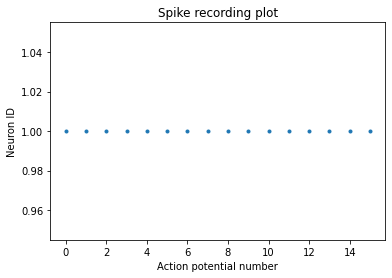

In [30]:
import scipy as sp
import nest
import numpy as np
import matplotlib.pyplot as plt

# Reset the kernel
nest.ResetKernel()

# Create a neuron
neuron = nest.Create("iaf_psc_alpha")

# Set constant current input
nest.SetStatus(neuron, {"I_e": 376.0})

# Create a spike detector to measure the neuron's activity
spike_recorder = nest.Create("spike_recorder")

# Connect the neuron to the spike detector
nest.Connect(neuron, spike_recorder)

# Simulate the network for 1000 ms
nest.Simulate(1000.0)

# Get the spike times from the spike detector
spike = nest.GetStatus(spike_recorder, "events")[0]

# Plot the spikes
plt.figure()
print(spike["senders"])
plt.plot(spike["senders"], '.')
plt.xlabel("Action potential number")
plt.ylabel("Neuron ID")
plt.title("Spike recording plot")
plt.show()


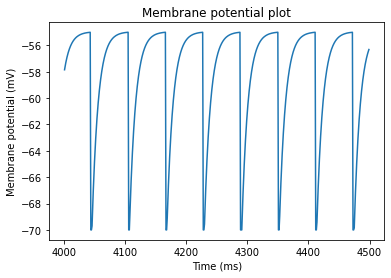

In [28]:
from matplotlib import figure


multimeter = nest.Create("multimeter", params={"record_from":["V_m"]})
nest.Connect(multimeter, neuron)
nest.Simulate(500.0)
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

plt.figure()
plt.plot(ts, Vms)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Membrane potential plot")
plt.show()

# 3-neuron model

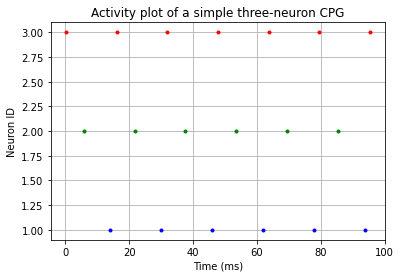

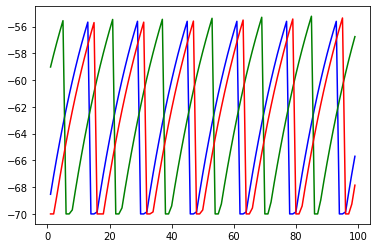

In [22]:
import nest
import matplotlib.pyplot as plt

# Initialize NEST
nest.ResetKernel()

# Create three neurons
neurons = nest.Create("iaf_psc_alpha", 3)

# External current and membrane time constant
I_e_base = 376.0
tau_m = 20.0

# Set neuron parameters with different initial membrane potentials
V_rest = -70.0
V_init_values = [V_rest, V_rest + 10, V_rest + 20]
for neuron, V_init in zip(neurons, V_init_values):
    nest.SetStatus(neuron, {"I_e": I_e_base, "tau_m": tau_m, "V_m": V_init})

# Set inhibitory weights and delays
weight = -5.0  # Moderately strong inhibition
delay = 10.0   # Short delay

# Create circular inhibitory connections
nest.Connect(neurons[0], neurons[1], syn_spec={"weight": weight, "delay": delay})
nest.Connect(neurons[1], neurons[2], syn_spec={"weight": weight, "delay": delay})
nest.Connect(neurons[2], neurons[0], syn_spec={"weight": weight, "delay": delay})

# Create spike recorders and connect them to neurons
spike_recorders = [nest.Create("spike_recorder") for _ in neurons]
for neuron, spike_recorder in zip(neurons, spike_recorders):
    nest.Connect(neuron, spike_recorder)

multimeters = [nest.Create("multimeter", params={"record_from": ["V_m"]}) for _ in neurons]
for neuron, mm in zip(neurons, multimeters):
    nest.Connect(mm, neuron)

# Simulate
nest.Simulate(100)

# Plot the activity results
colors = ['blue', 'green', 'red']
for spike_recorder, color in zip(spike_recorders, colors):
    spikes = nest.GetStatus(spike_recorder, "events")[0]
    plt.plot(spikes["times"], spikes["senders"], '.', color=color)
plt.title("Activity plot of a simple three-neuron CPG")
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.grid()
plt.show()

plt.figure(1)
for i, mm in enumerate(multimeters):
    dmm = nest.GetStatus(mm)[0]
    Vms = dmm["events"]["V_m"]
    ts = dmm["events"]["times"]
    plt.plot(ts, Vms, label=f'Neuron {i+1}', color=colors[i])

246.5
450.7
654.8000000000001
858.9
178.3
382.2
586.3000000000001
790.4
994.5
110.60000000000001
314.3
518.5
722.6
926.7


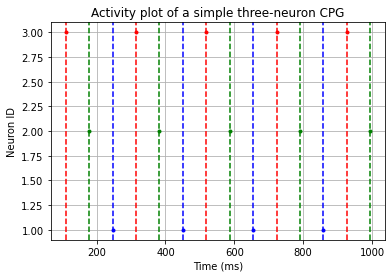

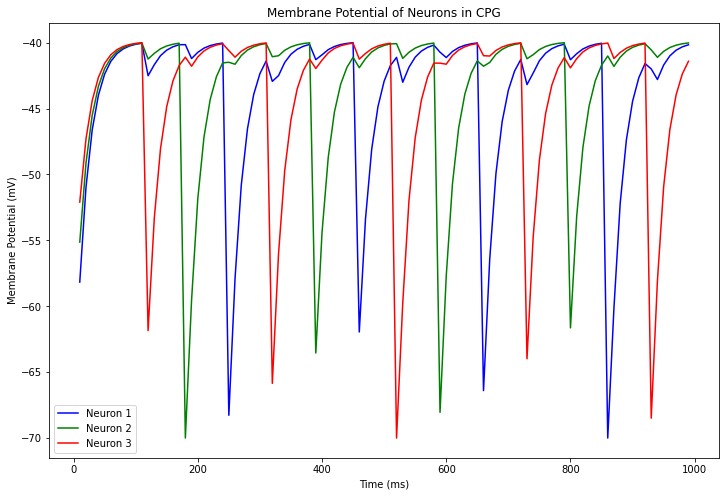

In [66]:
import nest
import matplotlib.pyplot as plt

# Initialize NEST
nest.ResetKernel()

# Create three neurons
neurons = nest.Create("iaf_psc_alpha", 3, params={"V_th": -40.0})

# Configure the neurons to have a slightly different resting membrane potential
# to ensure that they do not all fire at the same time
I_e_base = 376.0
tau_m = 20.0
V_rest = -70.0
V_init_values = [V_rest, V_rest + 5.0, V_rest + 10.0]
for neuron, V_init in zip(neurons, V_init_values):
    nest.SetStatus(neuron, {"V_m": V_init, "tau_m": tau_m, "I_e": I_e_base})

# Inhibitory synaptic weights and delays
weight = -80.0
delay = 1.0

# Set up circular inhibitory connections to form the CPG
nest.Connect(neurons, neurons, syn_spec={"weight": weight, "delay": delay})
nest.Connect(neurons[2], neurons[0], syn_spec={"weight": weight, "delay": delay})

# Create and configure a multimeter for recording the membrane potentials
multimeter = nest.Create("multimeter", params={"interval": 10.0, "record_from": ["V_m"]})

#nest.SetStatus(neurons[0], {"I_e": 50.0})
spike_recorders = [nest.Create("spike_recorder") for _ in neurons]
for neuron, spike_recorder in zip(neurons, spike_recorders):
    nest.Connect(neuron, spike_recorder)



# Connect the multimeter to all neurons
nest.Connect(multimeter, neurons)

# Simulate for 1000 ms
nest.Simulate(1000)

show_lines = True

colors = ['blue', 'green', 'red']
for spike_recorder, color in zip(spike_recorders, colors):
    spikes = nest.GetStatus(spike_recorder, "events")[0]
    plt.plot(spikes["times"], spikes["senders"], '.', color=color)
    if(show_lines):
        for i in range(0, len(spikes["times"])):
            print(spikes["times"][i])
            plt.axvline(spikes["times"][i], color=color, linestyle='--')
# for i in range(0, len(spikes["times"])):
#     print(spikes["times"][i])
plt.title("Activity plot of a simple three-neuron CPG")
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.grid()
plt.show()


# Get the data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
events = dmm["events"]

# Plot the membrane potentials
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red']
# Retrieve and plot data for each neuron
for idx, neuron_id in enumerate(neurons):
    # Select the data for the current neuron
    mask = events["senders"] == neuron_id
    times = events["times"][mask]
    V_m = events["V_m"][mask]
    
    plt.plot(times, V_m, label=f'Neuron {idx + 1}', color=colors[idx])

plt.title("Membrane Potential of Neurons in CPG")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.show()

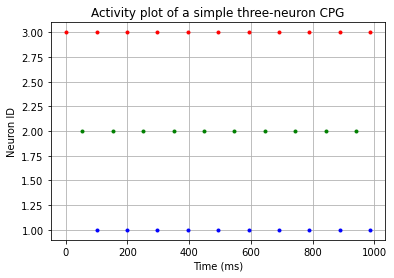

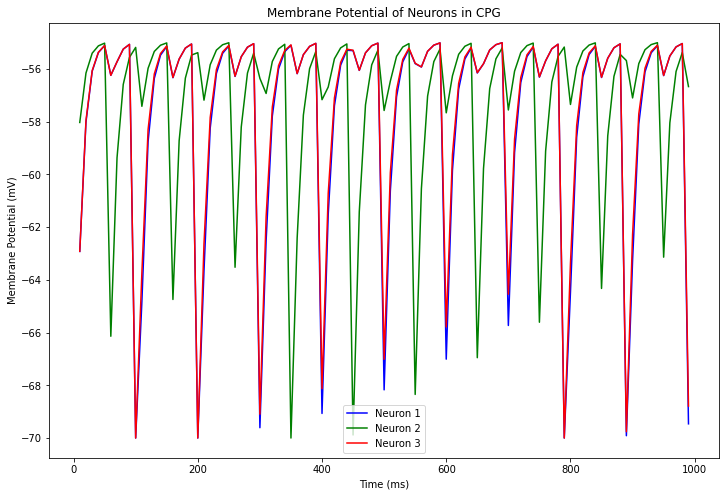

In [54]:
import nest
import matplotlib.pyplot as plt

# Initialize NEST
nest.ResetKernel()

# Create three neurons
neurons = nest.Create("iaf_psc_alpha", 3, params={"V_th": -55.0})

# Configure the neurons to have a slightly different resting membrane potential
# to ensure that they do not all fire at the same time
I_e_base = 376.0
tau_m = 10.0
V_rest = -70.0
V_init_values = [V_rest, V_rest + 10.0, V_rest + 100.0]
for neuron, V_init in zip(neurons, V_init_values):
    nest.SetStatus(neuron, {"V_m": V_init, "tau_m": tau_m, "I_e": I_e_base})

# Inhibitory synaptic weights and delays
weight = -100.0
delay = 1.0

# Set up circular inhibitory connections to form the CPG
nest.Connect(neurons, neurons, syn_spec={"weight": weight, "delay": delay})
nest.Connect(neurons[2], neurons[0], syn_spec={"weight": weight, "delay": delay})

# Create and configure a multimeter for recording the membrane potentials
multimeter = nest.Create("multimeter", params={"interval": 10.0, "record_from": ["V_m"]})

#nest.SetStatus(neurons[0], {"I_e": 50.0})
spike_recorders = [nest.Create("spike_recorder") for _ in neurons]
for neuron, spike_recorder in zip(neurons, spike_recorders):
    nest.Connect(neuron, spike_recorder)



# Connect the multimeter to all neurons
nest.Connect(multimeter, neurons)

# Simulate for 1000 ms
nest.Simulate(1000)

colors = ['blue', 'green', 'red']
for spike_recorder, color in zip(spike_recorders, colors):
    spikes = nest.GetStatus(spike_recorder, "events")[0]
    plt.plot(spikes["times"], spikes["senders"], '.', color=color)
plt.title("Activity plot of a simple three-neuron CPG")
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.grid()
plt.show()


# Get the data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
events = dmm["events"]

# Plot the membrane potentials
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red']
# Retrieve and plot data for each neuron
for idx, neuron_id in enumerate(neurons):
    # Select the data for the current neuron
    mask = events["senders"] == neuron_id
    times = events["times"][mask]
    V_m = events["V_m"][mask]
    
    plt.plot(times, V_m, label=f'Neuron {idx + 1}', color=colors[idx])

plt.title("Membrane Potential of Neurons in CPG")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.show()